In [22]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier



In [23]:
data = pd.read_csv('./data/tfidf.csv')

In [24]:
data.head()

,aadhar,aaj,aap,aapne,aati,aaye,aayen,ab,abhi,abhiyaan,...,yuva,zee,ziyarat,zonal,zone,âïâïâïâï,ðhighlander,ðquirky,ðââï,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


In [25]:
X = data.drop(columns=['label'])
Y = data['label']

In [26]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.3 , random_state=42)

In [18]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)


LogisticRegression()

In [19]:
y_pred = log_reg.predict(x_test)

In [20]:
report = classification_report(y_test , y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        86
           1       1.00      0.23      0.38        26
           2       0.00      0.00      0.00         6
           3       1.00      0.78      0.88        45
           4       0.85      0.73      0.78        62
           5       0.76      0.93      0.84        97
           6       0.59      0.81      0.68        58
           7       0.90      0.60      0.72        30

    accuracy                           0.77       410
   macro avg       0.73      0.62      0.64       410
weighted avg       0.79      0.77      0.76       410



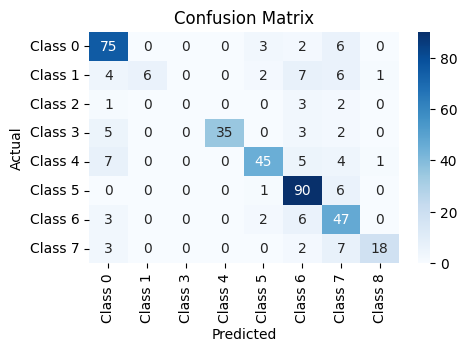

In [21]:
plt.figure(figsize=(5,3))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1",'Class 3' ,'Class 4' , 'Class 5','Class 6','Class 7','Class 8'],
            yticklabels=["Class 0", "Class 1",'Class 2' ,'Class 3', 'Class 4','Class 5','Class 6','Class 7'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [27]:
def model_test(model , x_test ,y_test ):
    y_pred = model.predict(x_test)
    
    report = classification_report(y_test , y_pred)
    print(report)
    
    plt.figure(figsize=(5,3))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1",'Class 3' ,'Class 4' , 'Class 5','Class 6','Class 7','Class 8'],
                yticklabels=["Class 0", "Class 1",'Class 2' ,'Class 3' , 'Class 4','Class 5','Class 6','Class 7'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        86
           1       1.00      0.15      0.27        26
           2       0.00      0.00      0.00         6
           3       1.00      0.62      0.77        45
           4       0.90      0.71      0.79        62
           5       0.79      0.93      0.85        97
           6       0.48      0.84      0.61        58
           7       0.84      0.53      0.65        30

    accuracy                           0.74       410
   macro avg       0.72      0.58      0.60       410
weighted avg       0.79      0.74      0.73       410



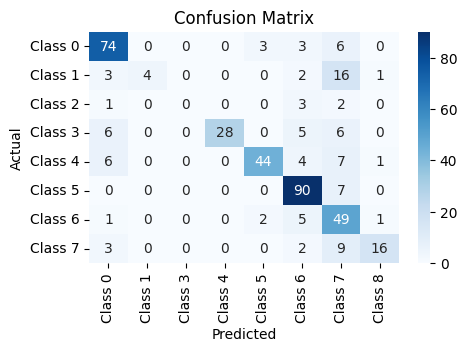

In [23]:
svc = SVC()
svc.fit(x_train,y_train)
model_test(svc,x_test,y_test)

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        86
           1       1.00      0.31      0.47        26
           2       0.00      0.00      0.00         6
           3       1.00      0.84      0.92        45
           4       1.00      0.87      0.93        62
           5       0.71      1.00      0.83        97
           6       0.96      0.79      0.87        58
           7       1.00      0.67      0.80        30

    accuracy                           0.85       410
   macro avg       0.81      0.69      0.71       410
weighted avg       0.87      0.85      0.84       410



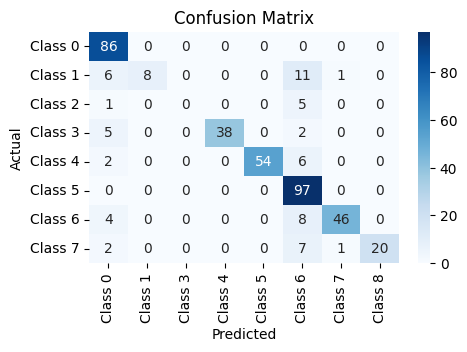

In [28]:
multi_nb = MultinomialNB()
multi_nb.fit(x_test,y_test)
model_test(multi_nb , x_test,y_test)

In [29]:
param_grid = {
    'alpha' : [0,0.1, 0.3,0.5,0.7,0.9 ,1,2,3,4,5] ,
    'force_alpha' : [True,False],
    'fit_prior' : [True , False]
}

In [30]:
grid_search = GridSearchCV(estimator=multi_nb , param_grid=param_grid , n_jobs= -1 , cv = 5 ,scoring='accuracy')

In [31]:
grid_search.fit(x_train,y_train)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 2, 3, 4, 5],
                         'fit_prior': [True, False],
                         'force_alpha': [True, False]},
             scoring='accuracy')

In [32]:
grid_search.best_params_

{'alpha': 0.9, 'fit_prior': False, 'force_alpha': True}

In [33]:
grid_search.best_score_

np.float64(0.7165194153577661)

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        86
           1       0.87      0.50      0.63        26
           2       0.17      0.50      0.25         6
           3       0.82      0.82      0.82        45
           4       0.81      0.77      0.79        62
           5       0.84      0.87      0.85        97
           6       0.81      0.45      0.58        58
           7       0.67      0.87      0.75        30

    accuracy                           0.77       410
   macro avg       0.72      0.71      0.69       410
weighted avg       0.79      0.77      0.76       410



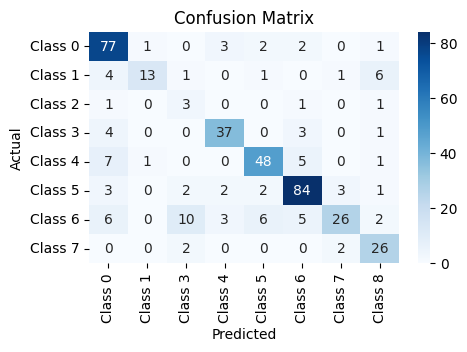

In [34]:
model_test(grid_search , x_test,y_test)

              precision    recall  f1-score   support

           0       0.72      0.90      0.80        86
           1       0.85      0.42      0.56        26
           2       0.40      0.33      0.36         6
           3       0.82      0.69      0.75        45
           4       0.65      0.74      0.69        62
           5       0.78      0.75      0.76        97
           6       0.63      0.38      0.47        58
           7       0.53      0.83      0.65        30

    accuracy                           0.70       410
   macro avg       0.67      0.63      0.63       410
weighted avg       0.71      0.70      0.69       410



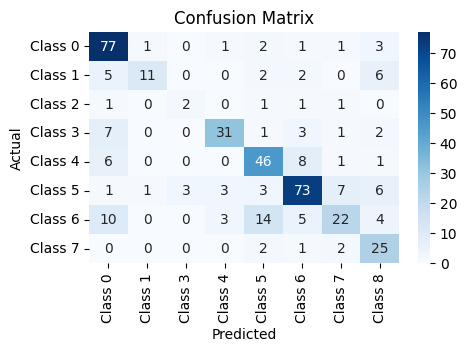

In [35]:
knn = KNeighborsClassifier(n_neighbors=20 , n_jobs=-1)
knn.fit(x_train,y_train)
model_test(knn,x_test,y_test)

In [36]:
k = [i for i in range(1,26)]
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


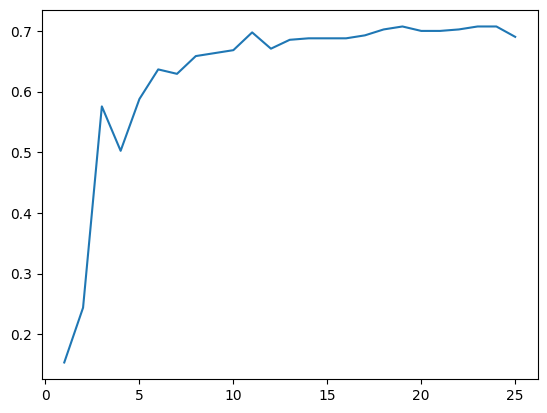

In [37]:
acc = []

for i in range(1,26) : 
    n_neighbors = i
    knn = KNeighborsClassifier(n_neighbors=n_neighbors , n_jobs=-1)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    acc.append(accuracy_score(y_test,y_pred))
    
plt.plot(k,acc)

In [38]:
param_grid = {
    'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25] , 
    'weights' : ['unifrom' , 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' :[i for i in range(1,51)],
    'p':[1,2]
    
}
knn = KNeighborsClassifier(n_jobs=-1)

In [ ]:
search_knn = GridSearchCV(estimator=knn , param_grid=param_grid , scoring='accuracy',cv = 5)
search_knn.fit(x_train,y_train)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fdda8bc2a40>>
Traceback (most recent call last):
  File "/home/nihar/Projects/rail_management_system/venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [ ]:
#with open('classiffication_model.pkl','wb') as file:
 #   pickle.dump(multi_nb, file)

In [6]:
from transformers import pipeline
import tensorflow as tf

# Use a TensorFlow-compatible model explicitly
classifier = pipeline("sentiment-analysis", framework="tf", model="distilbert-base-uncased-finetuned-sst-2-english")

print(classifier("I love Indian Railways service!"))


2025-04-06 12:38:04.654485: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-06 12:38:04.798098: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-06 12:38:06.572717: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-06 12:38:07.257381: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743923288.001766    4983 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743923288.21

[{'label': 'POSITIVE', 'score': 0.999840497970581}]


In [7]:
df = pd.read_csv('./data/clean_data.csv')

In [8]:
df.head()

,Item ID,Sentiment,SentimentText,Clean_text
0,1,0,"@RailMinIndia My PNR is 8348062961, I am in wa...",my pnr i way water toilet mess everywhere coac...
1,2,0,@sureshpprabhu @RailMinIndia AC not working in...,ac working prayag lucknow intercity today depa...
2,3,0,@RailMinIndia I'm traveling to chennai by trai...,im traveling chennai train coach s my berth di...
3,4,5,@RailMinIndia irctc is not responding at the t...,irctc responding time tatkal booking
4,5,7,@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,matter notified concerned official


In [9]:
df["predicted_sentiment"] = df["SentimentText"].apply(lambda text: classifier(text)[0]["label"])

In [10]:
df.head()


,Item ID,Sentiment,SentimentText,Clean_text,predicted_sentiment
0,1,0,"@RailMinIndia My PNR is 8348062961, I am in wa...",my pnr i way water toilet mess everywhere coac...,NEGATIVE
1,2,0,@sureshpprabhu @RailMinIndia AC not working in...,ac working prayag lucknow intercity today depa...,NEGATIVE
2,3,0,@RailMinIndia I'm traveling to chennai by trai...,im traveling chennai train coach s my berth di...,NEGATIVE
3,4,5,@RailMinIndia irctc is not responding at the t...,irctc responding time tatkal booking,NEGATIVE
4,5,7,@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...,matter notified concerned official,NEGATIVE


In [11]:
df["predicted_sentiment_score"] = df["SentimentText"].apply(lambda text: classifier(text)[0]["score"])

In [17]:
df.tail(2)

,Item ID,Sentiment,SentimentText,Clean_text,predicted_sentiment,predicted_sentiment_score
1364,1365,3,@RailMinIndia @sureshpprabhu While travelling ...,while travelling train noname duronto expressu...,NEGATIVE,0.997922
1365,1366,6,https://t.co/f27P3FSDcJ @PMOIndia @narendramodi,httpstcofpfsdcj,NEGATIVE,0.975837


In [19]:
df=df.drop(columns='Item ID')

In [ ]:
#df.to_csv("./data/data_with_sentiment.csv",index=False)